# Car_price Prediction Model
Objective:

The objective of the car selling price prediction project is to develop a machine learning model that accurately predicts the selling price of used cars based on various attributes. 

Problem Statement:

The problem is to predict the selling price of used cars accurately based on various attributes or features available in the dataset. Given a dataset containing information about car make and model, year of manufacture, present price, mileage, fuel type, selling type, transmission type, and number of previous owners, the task is to develop a machine learning model that can effectively estimate the selling price of cars. This prediction model aims to assist both sellers and buyers in making informed decisions about pricing and purchasing used cars in the automotive market.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import os
os.chdir('D:/py/')
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:

df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
df.shape

(301, 9)

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [9]:
df.mean()

Year              2013.627907
Selling_Price        4.661296
Present_Price        7.628472
Driven_kms       36947.205980
Owner                0.043189
dtype: float64

In [10]:
df.median()

Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Driven_kms       32000.0
Owner                0.0
dtype: float64

In [11]:
df['Car_Name'].mode()[0]

'city'

In [12]:
df['Selling_type'].mode()[0]

'Dealer'

In [13]:
df['Fuel_Type'].mode()[0]

'Petrol'

In [14]:
df['Transmission'].mode()[0]

'Manual'

In [15]:
group=df.groupby(by='Fuel_Type')[['Car_Name','Transmission','Selling_type']]
group

In [16]:
df.values[:10]

array([['ritz', 2014, 3.35, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0],
       ['sx4', 2013, 4.75, 9.54, 43000, 'Diesel', 'Dealer', 'Manual', 0],
       ['ciaz', 2017, 7.25, 9.85, 6900, 'Petrol', 'Dealer', 'Manual', 0],
       ['wagon r', 2011, 2.85, 4.15, 5200, 'Petrol', 'Dealer', 'Manual',
        0],
       ['swift', 2014, 4.6, 6.87, 42450, 'Diesel', 'Dealer', 'Manual', 0],
       ['vitara brezza', 2018, 9.25, 9.83, 2071, 'Diesel', 'Dealer',
        'Manual', 0],
       ['ciaz', 2015, 6.75, 8.12, 18796, 'Petrol', 'Dealer', 'Manual', 0],
       ['s cross', 2015, 6.5, 8.61, 33429, 'Diesel', 'Dealer', 'Manual',
        0],
       ['ciaz', 2016, 8.75, 8.89, 20273, 'Diesel', 'Dealer', 'Manual', 0],
       ['ciaz', 2015, 7.45, 8.92, 42367, 'Diesel', 'Dealer', 'Manual', 0]],
      dtype=object)

In [17]:
df.value_counts(['Fuel_Type'])

Fuel_Type
Petrol       239
Diesel        60
CNG            2
dtype: int64

In [18]:
df.value_counts(['Transmission'])

Transmission
Manual          261
Automatic        40
dtype: int64

In [19]:
df.value_counts(['Selling_type'])

Selling_type
Dealer          195
Individual      106
dtype: int64

In [20]:
df.value_counts(['Car_Name'])[:10]

Car_Name                 
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
Royal Enfield Classic 350     7
dtype: int64

In [21]:
df.value_counts(['Year'])[:10]

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
dtype: int64

## plotting

<AxesSubplot:>

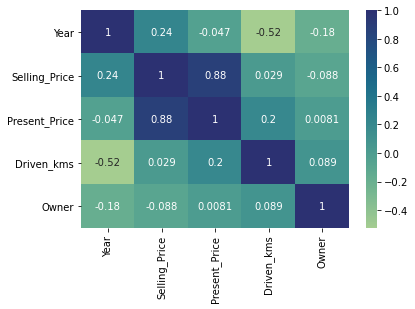

In [23]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

<AxesSubplot:xlabel='Year', ylabel='Driven_kms'>

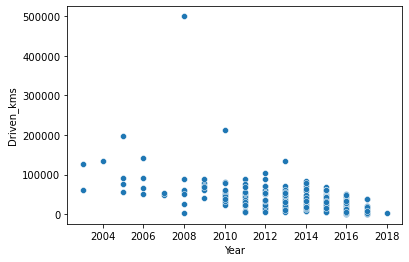

In [24]:
sns.scatterplot(x=df['Year'], y=df['Driven_kms'])

<AxesSubplot:xlabel='Year', ylabel='Owner'>

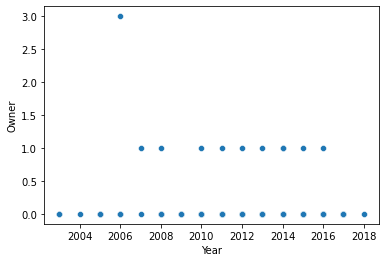

In [25]:
sns.scatterplot(x=df['Year'], y=df['Owner'])

<AxesSubplot:xlabel='Driven_kms', ylabel='Owner'>

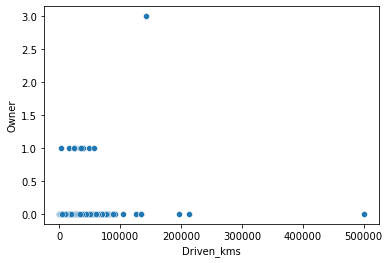

In [26]:
sns.scatterplot(x=df['Driven_kms'], y=df['Owner'])

In [27]:
plot=pd.crosstab(df['Car_Name'],df['Fuel_Type'])
plot[:10]

Fuel_Type,CNG,Diesel,Petrol
Car_Name,,,
800,0,0,1
Activa 3g,0,0,2
Activa 4g,0,0,1
Bajaj ct 100,0,0,1
Bajaj Avenger 150,0,0,1
Bajaj Avenger 150 street,0,0,1
Bajaj Avenger 220,0,0,3
Bajaj Avenger 220 dtsi,0,0,2
Bajaj Avenger Street 220,0,0,1


In [28]:
plot_1=pd.crosstab(df['Car_Name'],df['Transmission'])
plot_1[:10]

Transmission,Automatic,Manual
Car_Name,,
800,0,1
Activa 3g,2,0
Activa 4g,1,0
Bajaj ct 100,0,1
Bajaj Avenger 150,0,1
Bajaj Avenger 150 street,0,1
Bajaj Avenger 220,0,3
Bajaj Avenger 220 dtsi,0,2
Bajaj Avenger Street 220,0,1


In [29]:
plot_2=pd.crosstab(df['Car_Name'],df['Selling_type'])
plot_2[:10]

Selling_type,Dealer,Individual
Car_Name,,
800,0,1
Activa 3g,0,2
Activa 4g,0,1
Bajaj ct 100,0,1
Bajaj Avenger 150,0,1
Bajaj Avenger 150 street,0,1
Bajaj Avenger 220,0,3
Bajaj Avenger 220 dtsi,0,2
Bajaj Avenger Street 220,0,1


<AxesSubplot:xlabel='Fuel_Type', ylabel='Year'>

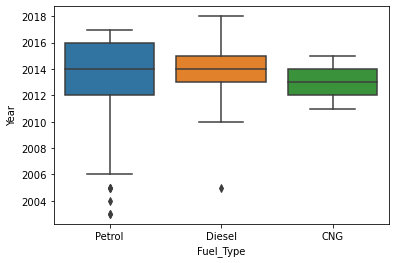

In [30]:
sns.boxplot(y=df['Year'],x=df['Fuel_Type'])

<AxesSubplot:xlabel='Transmission', ylabel='Year'>

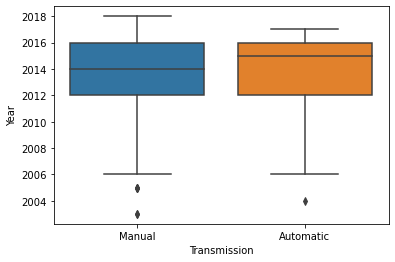

In [31]:
sns.boxplot(y=df['Year'],x=df['Transmission'])

<AxesSubplot:xlabel='Selling_type', ylabel='Year'>

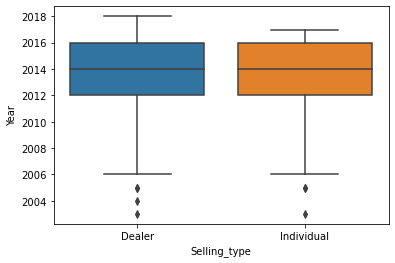

In [32]:
sns.boxplot(y=df['Year'],x=df['Selling_type'])

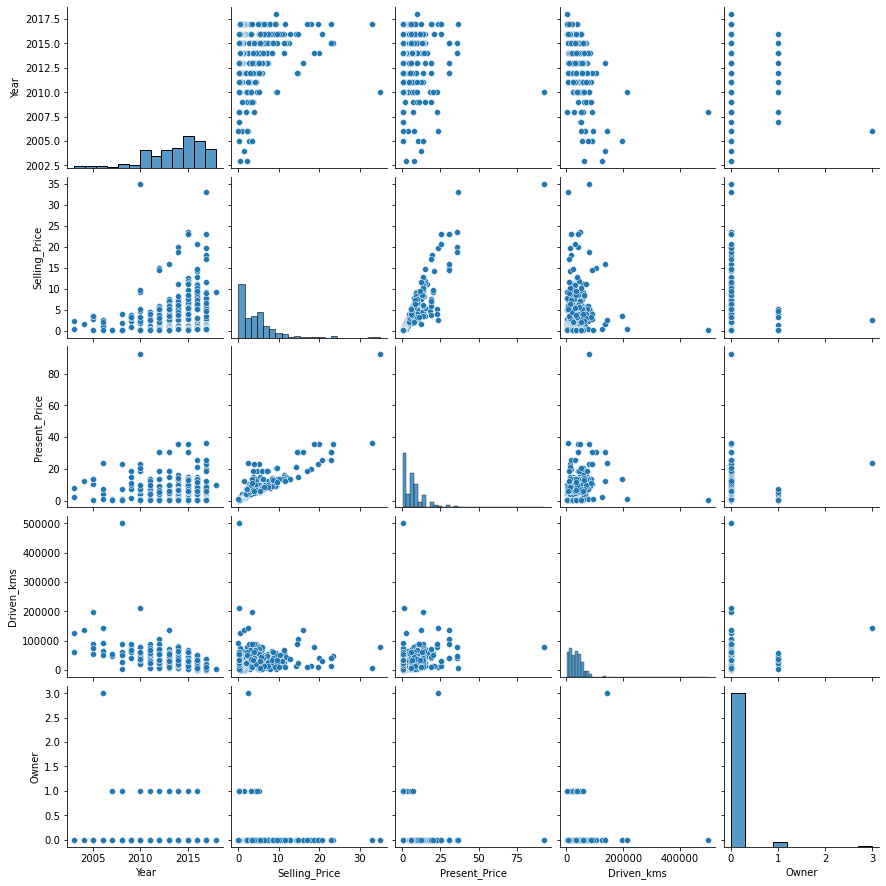

In [33]:
sns.pairplot(df)

<AxesSubplot:xlabel='Year', ylabel='Transmission'>

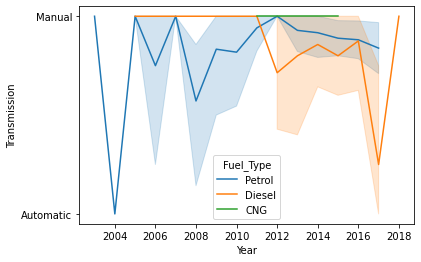

In [34]:
sns.lineplot(x=df['Year'], y=df['Transmission'],hue=df['Fuel_Type'])

<AxesSubplot:xlabel='Year', ylabel='Fuel_Type'>

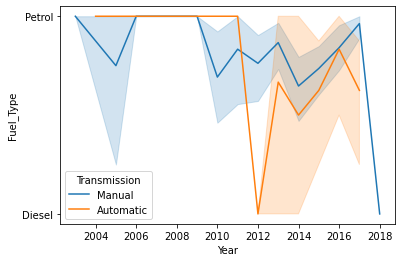

In [35]:
sns.lineplot(x=df['Year'], y=df['Fuel_Type'], hue=df['Transmission'])

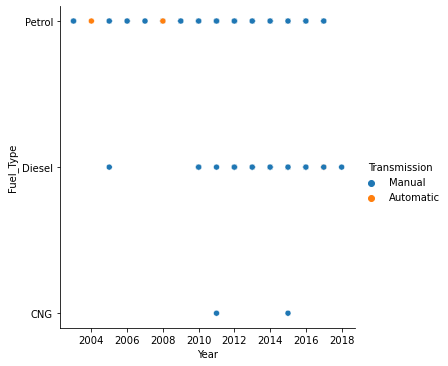

In [36]:
sns.relplot(x=df['Year'], y=df['Fuel_Type'], hue=df['Transmission'])

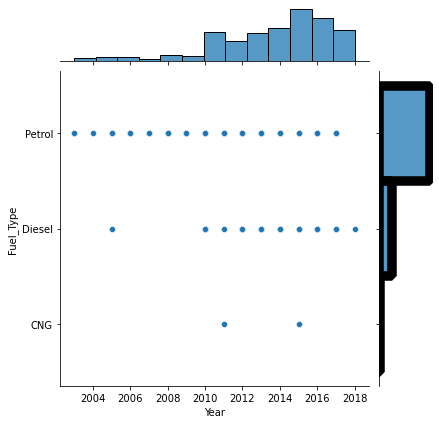

In [37]:
sns.jointplot(x=df['Year'], y=df['Fuel_Type'])

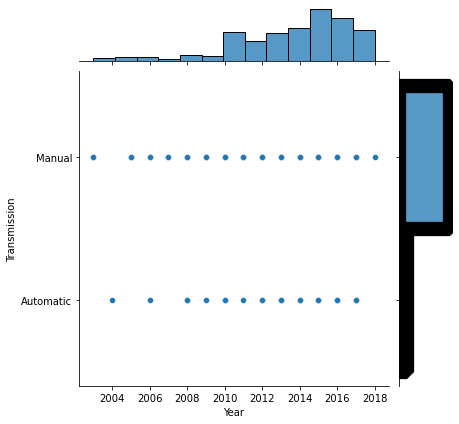

In [38]:
sns.jointplot(x=df['Year'], y=df['Transmission'])

<AxesSubplot:xlabel='Year', ylabel='Count'>

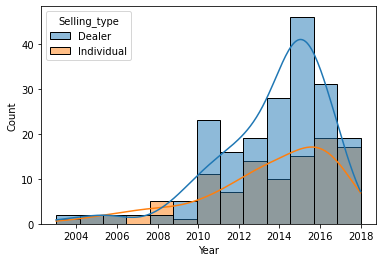

In [39]:
sns.histplot(x=df['Year'],hue=df['Selling_type'],kde=True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

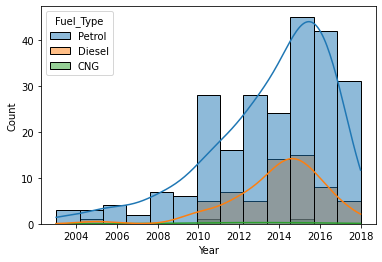

In [40]:
sns.histplot(x=df['Year'],hue=df['Fuel_Type'], kde=True)

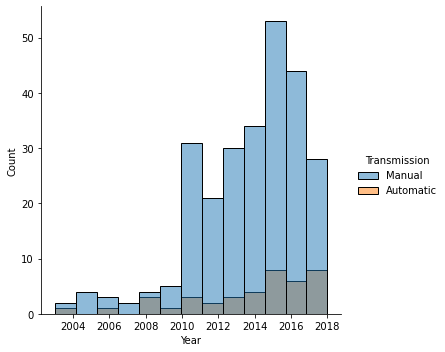

In [41]:
sns.displot(x=df['Year'],hue=df['Transmission'])

<AxesSubplot:xlabel='Owner', ylabel='count'>

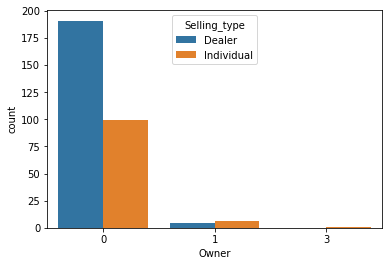

In [42]:
sns.countplot(x=df['Owner'],hue=df['Selling_type'])

<AxesSubplot:xlabel='Owner', ylabel='count'>

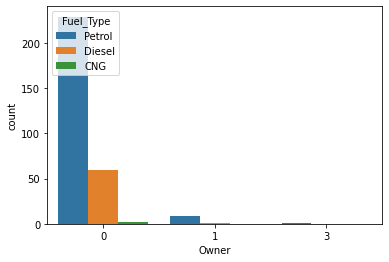

In [43]:
sns.countplot(x=df['Owner'],hue=df['Fuel_Type'])

In [44]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# define x and y

In [45]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [46]:
x

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [47]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Preproccsing

In [48]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [49]:
cat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [50]:
con

['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [52]:
cat_pip=Pipeline(steps=([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())]))
print(cat_pip)
print('_'*30)

con_pip=Pipeline(steps=([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())]))
print(con_pip)
print('_'*30)

pre=ColumnTransformer([('cat_pipp',cat_pip,cat),('con_pipp',con_pip,con)])
print(pre)


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])
______________________________
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])
______________________________
ColumnTransformer(transformers=[('cat_pipp',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['Car_Name', 'Fuel_Type', 'Selling_type',
                                  'Transmission']),
                                ('con_pipp',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Year', 'Present_Price', 'Driven_kms',
        

In [53]:
x_feat=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x_feat

,cat_pipp__Car_Name,cat_pipp__Fuel_Type,cat_pipp__Selling_type,cat_pipp__Transmission,con_pipp__Year,con_pipp__Present_Price,con_pipp__Driven_kms,con_pipp__Owner
0,90.0,2.0,0.0,1.0,0.128897,-0.236256,-0.256224,-0.174501
1,93.0,1.0,0.0,1.0,-0.217514,0.221544,0.155911,-0.174501
2,68.0,2.0,0.0,1.0,1.168129,0.257472,-0.773969,-0.174501
3,96.0,2.0,0.0,1.0,-0.910335,-0.403151,-0.817758,-0.174501
4,92.0,1.0,0.0,1.0,0.128897,-0.087906,0.141743,-0.174501
...,...,...,...,...,...,...,...,...
296,69.0,1.0,0.0,1.0,0.821718,0.460295,-0.076225,-0.174501
297,66.0,2.0,0.0,1.0,0.475308,-0.200328,0.593804,-0.174501
298,69.0,2.0,0.0,1.0,-1.603156,0.390756,1.313340,-0.174501
299,69.0,1.0,0.0,1.0,1.168129,0.564604,-0.719876,-0.174501


# Split

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x_feat,y,test_size=0.15,random_state=36)

In [56]:
x_train

,cat_pipp__Car_Name,cat_pipp__Fuel_Type,cat_pipp__Selling_type,cat_pipp__Transmission,con_pipp__Year,con_pipp__Present_Price,con_pipp__Driven_kms,con_pipp__Owner
57,71.0,2.0,0.0,1.0,-1.256746,1.264633,0.336220,-0.174501
239,75.0,2.0,0.0,1.0,-0.563924,-0.370699,-0.340995,-0.174501
156,54.0,2.0,1.0,1.0,1.168129,-0.823863,-0.565326,-0.174501
61,77.0,2.0,0.0,1.0,0.475308,0.008290,0.093781,-0.174501
242,97.0,2.0,0.0,1.0,0.128897,-0.057772,-0.075915,-0.174501
...,...,...,...,...,...,...,...,...
137,20.0,2.0,1.0,1.0,-0.217514,-0.792918,-0.539567,-0.174501
250,72.0,1.0,0.0,1.0,0.821718,0.692093,-0.026099,-0.174501
161,52.0,2.0,1.0,1.0,0.128897,-0.788398,-0.359258,-0.174501
98,71.0,2.0,0.0,1.0,-0.217514,1.272746,0.207427,-0.174501


In [57]:
y_train

57      4.75
239     2.00
156     0.48
61      4.50
242     4.40
       ...  
137     0.65
250    12.90
161     0.45
98      7.05
133     0.72
Name: Selling_Price, Length: 255, dtype: float64

# model

In [59]:
lr=LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
lr.intercept_

9.91741469412176

In [62]:
lr.coef_

array([-0.00485259, -1.67877514, -1.35694769, -1.65739909,  1.07603773,
        3.78261423, -0.3232298 , -0.17848977])

# evaluation on traing

In [63]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([ 7.91171524e+00,  2.67087178e+00,  1.63794768e+00,  5.07245642e+00,
        4.40761629e+00,  7.15457257e+00,  7.82928935e+00,  4.41346080e+00,
        4.30728330e+00,  1.33109515e+00,  1.11542785e+00,  5.03145942e+00,
        9.01069253e+00,  2.34014826e+00,  7.82762418e+00, -1.71647114e+00,
        1.13849284e+00,  5.20423353e+00,  1.63051838e+00,  8.46341063e+00,
        7.14184479e+00, -2.23462298e+00,  1.09086716e+01,  9.90287502e+00,
        3.49165946e+00,  9.53715644e-02,  1.55444619e+01,  1.15036143e+01,
        8.51647903e+00,  4.65435688e+00,  2.14864285e+00, -3.02486498e+00,
        8.75833990e-01,  7.08467551e+00,  1.03570704e+00, -7.94794888e-01,
        1.29570837e+00,  4.88670845e+00,  5.20315116e+00,  2.08612448e+00,
        3.99892584e+00,  3.04021668e-01,  1.46149963e+01,  1.93144847e+00,
        8.31710419e+00,  6.33311811e-01,  2.60611889e+00,  6.04255832e+00,
        8.85729977e-01,  4.25520064e+00,  2.86975851e+00,  2.17313131e+00,
        6.56459539e+00, -

In [65]:
mae=mean_absolute_error(y_pred_train,y_train)
print('MAE=',mae)

mse=mean_squared_error(y_pred_train,y_train)
print('MSE=',mse)

rmse=mse**0.5
print('RSME=',rmse)

r=r2_score(y_pred_train,y_train)
print('R2=',r)

MAE= 1.2150081833921518
MSE= 3.261703610394255
RSME= 1.806018718173833
R2= 0.8570444840933631


Text(0, 0.5, 'y_pred_train')

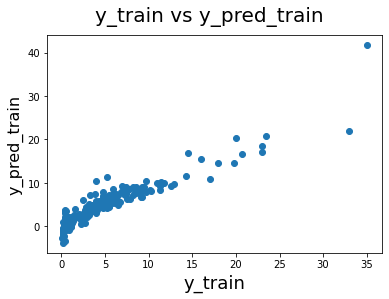

In [66]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred_train', fontsize=20)               
plt.xlabel('y_train', fontsize=18)                         
plt.ylabel('y_pred_train', fontsize=16)  

# evaluation on testing

In [67]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([ 7.49544371,  6.63178254,  4.43124739,  6.30076978,  4.06080909,
        7.85849301,  1.59971535,  4.50243389,  5.99224797,  4.287652  ,
       -0.26175975,  5.70505078,  2.67439567,  3.30927668,  7.96858895,
        1.0872744 ,  6.59847896,  2.33382707,  1.99805562,  0.93701117,
       20.09417922, 10.45163354,  1.80628446,  1.56364299,  2.18400114,
        4.8843938 ,  6.51898129,  6.36925539,  5.19610119, 16.78087492,
       10.30437637,  2.9008572 , -2.31469499,  8.0842101 ,  0.08836623,
       18.43787147,  6.80055065,  4.37260789,  7.34816377,  3.33075089,
        8.24596092,  0.70183203,  1.62122253,  7.75269113,  1.69896707,
       -0.45442607])

In [68]:
mae1=mean_absolute_error(y_pred_test,y_test)
print('MAE=',mae1)

mse1=mean_squared_error(y_pred_test,y_test)
print('MSE=',mse1)

rmse1=mse1**0.5
print('RSME=',rmse1)

r1=r2_score(y_pred_test,y_test)
print('R2=',r1)

MAE= 1.075151343062582
MSE= 2.519555188089284
RSME= 1.587310677872887
R2= 0.8790296030589109


Text(0, 0.5, 'y_test_pred')

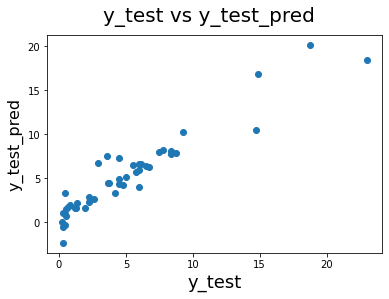

In [69]:
# Plotting y_test and y_test_pred to understand 
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)  

In [70]:
data = pd.DataFrame(data={"Predicted Car Price": y_pred_test.flatten()})
print(data)

    Predicted Car Price
0              7.495444
1              6.631783
2              4.431247
3              6.300770
4              4.060809
5              7.858493
6              1.599715
7              4.502434
8              5.992248
9              4.287652
10            -0.261760
11             5.705051
12             2.674396
13             3.309277
14             7.968589
15             1.087274
16             6.598479
17             2.333827
18             1.998056
19             0.937011
20            20.094179
21            10.451634
22             1.806284
23             1.563643
24             2.184001
25             4.884394
26             6.518981
27             6.369255
28             5.196101
29            16.780875
30            10.304376
31             2.900857
32            -2.314695
33             8.084210
34             0.088366
35            18.437871
36             6.800551
37             4.372608
38             7.348164
39             3.330751
40             8

In [71]:
df['Car_Name'].values

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 'ciaz',
       's cross', 'ciaz', 'ciaz', 'alto 800', 'ciaz', 'ciaz', 'ertiga',
       'dzire', 'ertiga', 'ertiga', 'ertiga', 'wagon r', 'sx4',
       'alto k10', 'ignis', 'sx4', 'alto k10', 'wagon r', 'swift',
       'swift', 'swift', 'alto k10', 'ciaz', 'ritz', 'ritz', 'swift',
       'ertiga', 'dzire', 'sx4', 'dzire', '800', 'alto k10', 'sx4',
       'baleno', 'alto k10', 'sx4', 'dzire', 'omni', 'ciaz', 'ritz',
       'wagon r', 'ertiga', 'ciaz', 'fortuner', 'fortuner', 'innova',
       'fortuner', 'innova', 'corolla altis', 'etios cross',
       'corolla altis', 'etios g', 'fortuner', 'corolla altis',
       'etios cross', 'fortuner', 'fortuner', 'fortuner', 'etios liva',
       'innova', 'fortuner', 'corolla altis', 'corolla altis',
       'etios liva', 'corolla altis', 'corolla altis', 'etios liva',
       'etios cross', 'etios g', 'corolla altis', 'corolla',
       'corolla altis', 'fortuner', 'corolla altis', 'e

In [99]:
import pandas as pd
import numpy as np

# car_name = str(input('Enter car name: '))         
# year = int(input('Year of manufacture: '))          
# Present_price = float(input( 'Enter car present price: '))
# driven_km = int(input('Year of driven km: '))
# fuel_type = str(input('Enter car fuel type: '))
# selling_type = str(input('Year of selling type: '))
# transmission = str(input('Enter transmission type: '))
# owner = int(input('Year of ownership: '))

# Create a dictionary with the user inputs
def predict_selling_price(car_name, year, present_price, driven_km, fuel_type, selling_type, transmission, owner,processor,model):
    car_data = {
        'Car_Name': [car_name],
        'Year': [year],
        'Present_Price': [Present_price],  # Assuming Present_Price is the same as Selling_Price for simplicity
        'Driven_kms': [driven_km],
        'Fuel_Type': [fuel_type],
        'Selling_type': [selling_type],
        'Transmission': [transmission],
        'Owner': [owner]
        }

# Create a DataFrame from the dictionary
    df3 = pd.DataFrame(car_data)

# transforming the data
    preth=pd.DataFrame(processor.transform(df3),columns=processor.get_feature_names_out())

#prediction of the Selling price

    predition=model.predict(preth)
    prediction = np.round(predition, 2)

# Adding the col. to the data
    df3[['Selling_price']]=prediction

#print the data
    return df3

In [101]:
predict_selling_price('city',2014,6.54,54221,'Petrol','Dealer','Automatic',0,pre,lr)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_price
0,city,2014,6.39,54221,Petrol,Dealer,Automatic,0,5.71


In [102]:
predict_selling_price('i10',2016,7.54,34221,'Petrol','Dealer','Manual',0,pre,lr)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_price
0,i10,2016,6.39,34221,Petrol,Dealer,Manual,0,4.89
